In [1]:
# all the imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [3]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [6]:
categories = ["room_category", "booking_platform", "booking_status"]
for categorie in categories:
    print(categorie,":", df_bookings[f"{categorie}"].unique())

room_category : ['RT1' 'RT2' 'RT3' 'RT4']
booking_platform : ['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']
booking_status : ['Checked Out' 'Cancelled' 'No Show']


In [7]:
for categorie in categories:
    print(df_bookings[f"{categorie}"].value_counts())
    print("*"*30)

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64
******************************
booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64
******************************
booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64
******************************


In [8]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [9]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [10]:
df_hotels.shape

(25, 4)

In [12]:
categories = ["property_name", "category", "city"]
for categorie in categories:
    print(categorie,":", df_hotels[f"{categorie}"].unique())

property_name : ['Atliq Grands' 'Atliq Exotica' 'Atliq City' 'Atliq Blu' 'Atliq Bay'
 'Atliq Palace' 'Atliq Seasons']
category : ['Luxury' 'Business']
city : ['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']


In [13]:
for categorie in categories:
    print(df_hotels[f"{categorie}"].value_counts())
    print("*"*30)

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64
******************************
category
Luxury      16
Business     9
Name: count, dtype: int64
******************************
city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64
******************************


In [14]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [15]:
df_agg_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0


In [16]:
df_agg_bookings.shape

(9200, 5)

In [17]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


# Data Cleaning

In [18]:
# some negative values in no.of guest which is not possible so deleting those rows
df_bookings = df_bookings[df_bookings["no_guests"] > 0]
df_bookings["no_guests"].min()

np.float64(1.0)

In [19]:
# there is some null values in ratings given. so lets fill with 0
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77899
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [20]:
df_bookings["ratings_given"] = df_bookings["ratings_given"].fillna(0)
df_bookings["ratings_given"].isnull().sum()

np.int64(0)

In [21]:
# there is different formats of dates. so lets convert every date to YYYY-MM-DD
df_bookings['booking_date'] = pd.to_datetime(df_bookings['booking_date'], dayfirst=True, format='mixed')
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], dayfirst=True, format='mixed')
df_bookings['checkout_date'] = pd.to_datetime(df_bookings['checkout_date'], dayfirst=True, format='mixed')
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,0.0,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2.0,RT1,others,0.0,Cancelled,9100,3640


### Lets look for outliers

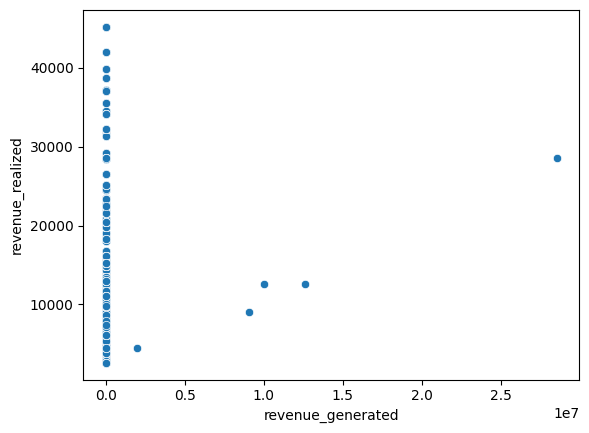

In [22]:
#Scatter plot
sns.scatterplot(x='revenue_generated', y='revenue_realized', data=df_bookings)
plt.show()

<Axes: xlabel='room_category', ylabel='revenue_generated'>

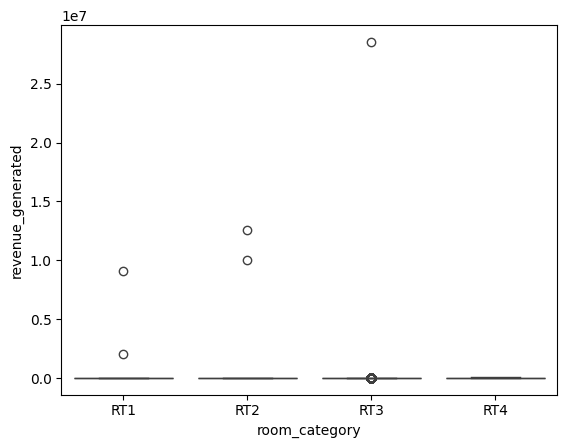

In [23]:
#Box plot
sns.boxplot(x='room_category', y='revenue_generated', data=df_bookings)

In [24]:
# lets remove outliers using 3rd std method
def remove_group_outliers(group):
    mean = group['revenue_generated'].mean()
    std = group['revenue_generated'].std()
    return group[
        (group['revenue_generated'] >= mean - 3 * std) &
        (group['revenue_generated'] <= mean + 3 * std)
    ]

df_bookings = (
    df_bookings.groupby('no_guests', group_keys=False)
    .apply(remove_group_outliers, include_groups=True)
    .reset_index(drop=True)
)

/var/folders/rz/hhc8t_wd1970zc2lx7c0yxg00000gn/T/ipykernel_85809/2729855572.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(remove_group_outliers, include_groups=True)


<Axes: xlabel='room_category', ylabel='revenue_generated'>

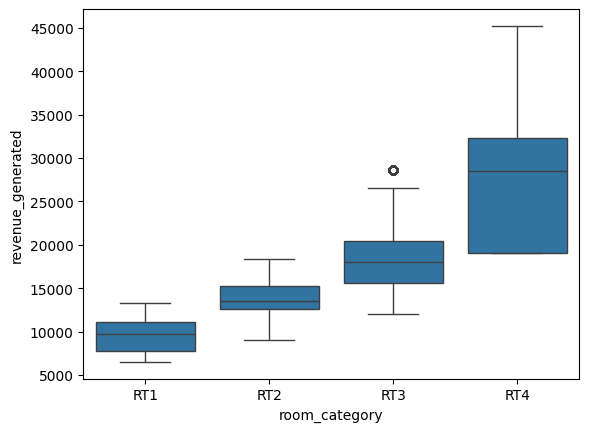

In [25]:
# After removing outliers
sns.boxplot(x='room_category', y='revenue_generated', data=df_bookings)

In [27]:
# lets remove date format in this dataset as well
df_agg_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], dayfirst=True, format='mixed')
df_agg_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0


In [28]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [30]:
# lets drop those null rows
df_agg_bookings = df_agg_bookings.dropna()
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [31]:
# there is inaccurate row like successful_bookings is greater than capacity. which is not possible. lets remove those rows
df_agg_bookings = df_agg_bookings[df_agg_bookings['successful_bookings'] <= df_agg_bookings['capacity']]

# Data Transformation

In [32]:
# lets join some dataset
df = pd.merge(df_bookings, df_rooms, left_on='room_category', right_on='room_id')
df = pd.merge(df, df_hotels, on='property_id')
df.drop(columns=["room_id", "category"], inplace=True)
df.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,room_class,property_name,city
0,May012216558RT110,16558,2022-04-28,2022-05-01,2022-05-02,1.0,RT1,others,4.0,Checked Out,9100,9100,Standard,Atliq Grands,Delhi
1,May012216558RT111,16558,2022-04-29,2022-05-01,2022-05-07,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100,Standard,Atliq Grands,Delhi
2,May012216558RT114,16558,2022-04-30,2022-05-01,2022-05-05,1.0,RT1,logtrip,0.0,Cancelled,9100,3640,Standard,Atliq Grands,Delhi
3,May012216558RT23,16558,2022-04-10,2022-05-01,2022-05-07,1.0,RT2,makeyourtrip,0.0,Checked Out,12600,12600,Elite,Atliq Grands,Delhi
4,May012216558RT25,16558,2022-04-26,2022-05-01,2022-05-02,1.0,RT2,direct offline,0.0,Cancelled,12600,5040,Elite,Atliq Grands,Delhi


In [33]:
# lets add new logical columns to make things easy
df['stay_length'] = (df['checkout_date'] - df['check_in_date']).dt.days
df['lead_time'] = (df['check_in_date'] - df['booking_date']).dt.days
df['day_type'] = df['check_in_date'].dt.dayofweek.apply(lambda x: 'weekend' if x >= 5 else 'weekday')
df['is_successful'] = df['booking_status'].apply(lambda x: 1 if x == 'Checked Out' else 0)

In [34]:
df.to_csv("datasets/transactions.csv")